In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error


import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv("C:/Users/PC/Desktop/Data Preprocessing/Salary_Data.csv")

In [31]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [33]:
df.sample(n=3)

,YearsExperience,Salary
1,1.3,46205.0
23,8.2,113812.0
15,4.9,67938.0


In [34]:
df.shape

(30, 2)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [36]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


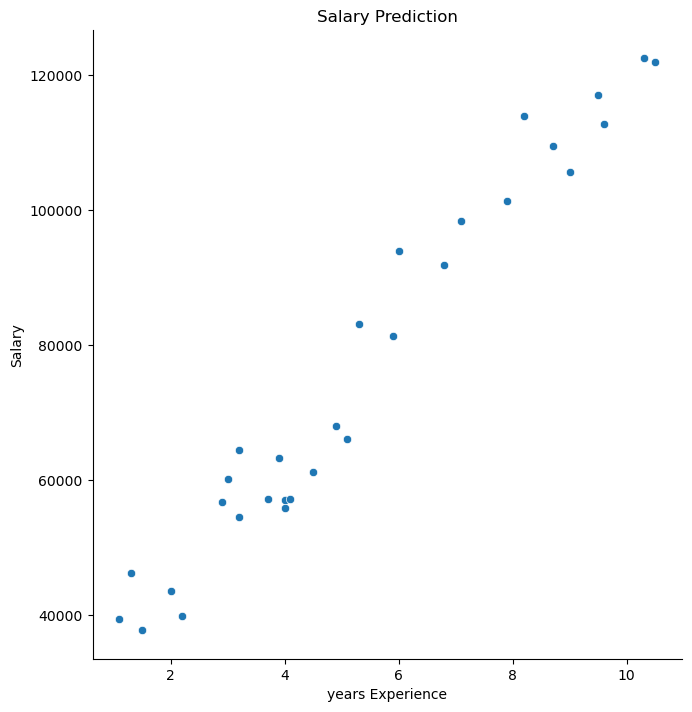

In [37]:
plt.Figure(figsize=(3,3))
sns.pairplot(df, x_vars = ["YearsExperience"] , y_vars = ["Salary"], size = 7 , kind = "scatter")
plt.xlabel("years Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

In [38]:
X = df.drop(["Salary"],axis=1)
y = df[["Salary"]]

In [39]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [40]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [41]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.8 , random_state = 10)

In [42]:
my_model = LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Salary')

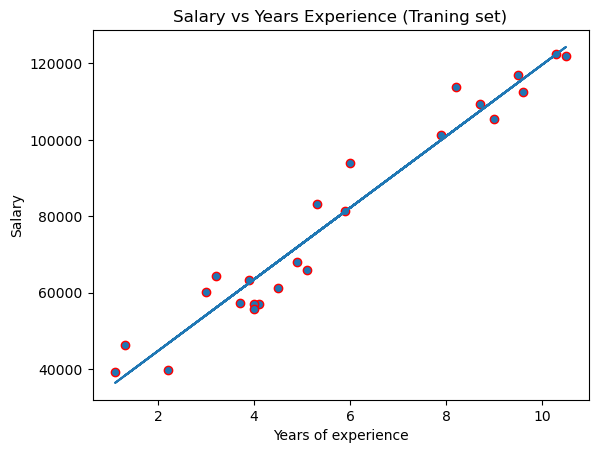

In [44]:
plt.scatter(X_train,y_train,edgecolors = "red")
plt.plot(X_train,my_model.predict(X_train))
plt.title("Salary vs Years Experience (Traning set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")


Text(0, 0.5, 'Salary')

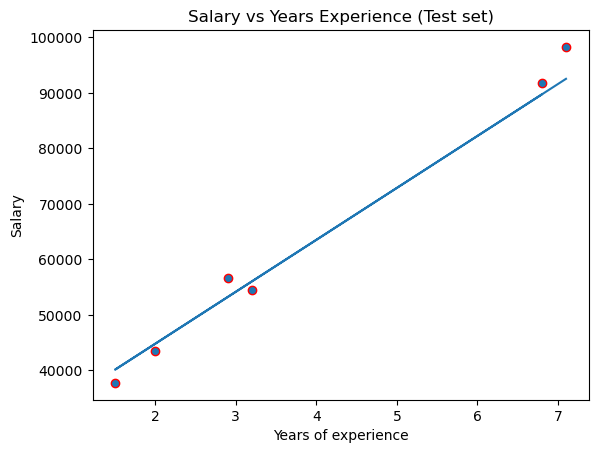

In [46]:
y_pred = my_model.predict(X_test)
plt.scatter(X_test,y_test,edgecolors="red")
plt.plot(X_test,y_pred)
plt.title("Salary vs Years Experience (Test set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")


In [ ]:
y_pred

array([[89715.76498848],
       [56031.05821174],
       [53223.99931368],
       [40124.39112273],
       [44802.8226195 ],
       [92522.82388655]])

In [50]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)

# calclate r2 score
r2s = r2_score(y_test,y_pred) 

print(f"Mean Square Error (MSE) : {mse}")
print(f"R2 Score : {r2s}")

print(f"Intercept of the line : {my_model.intercept_}")
print(f"Slope of the line : {my_model.coef_}")

Mean Square Error (MSE) : 9785570.138914311
R2 Score : 0.9816423482070253
Intercept of the line : [26089.09663242]
Slope of the line : [[9356.86299354]]


In [51]:
y_hat = 9356.86299354 * 4.5 + 26089.09663242
print(y_hat)

68194.98010335


In [52]:
y_hat = 9356.86299354 * 10.5 + 26089.09663242
print(y_hat)

124336.15806459
